<font size='6'>
  MANOVA Indonesian Culture by Contribution
</font>

<img src="https://gaetlokal.id/cni-content/uploads/modules/posts/20200911120948.png" width=720><br>
<font size='3'>
  Pada penelitian ini dilakukan pengujian keterkaitan besar kontribusi masyarakat terhadap banyak budaya. Pengujian dilakukan dengan menggunakan uji MANOVA dengan membagi data menjadi kolom independen (data kategori) dan kolom dependen (data non kategori). Kolom independen berisi rating T (Tinggi) dan R (Rendah) berdasarkan dari besar persentase setiap jenis kontribusi terhadap rata-ratanya, kontribusi tersebut ialah sebagai berikut.
<ul>
  <li>Persentase Rumah Tangga yang Menghadiri dan Menyelenggarakan Upacara Adat.</li>
</ul>
Kemudian, kolom dependen ialah sebagai berikut.
<ul>
  <li>Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan.</li>
  <li>Keterampilan dan Kemahiran Kerajinan Tradisional.</li>
  <li>Pengetahuan dan kebiasaan perilaku mengenai alam dan semesta.</li>
  <li>Seni Pertunjukan.</li>
  <li>Tradisi dan Ekspresi Lisan.</li>
</ul>
Kemudian untuk menggunakan uji MANOVA diperlukan asumsi-asumsi sebagai berikut.
<ul>
  <li>Variabel dependen berdistribusi normal multivariat.</li>
  <li>Varian dari populasi bersifat homogen.</li>
</ul>
</font>

---

# Import <i>Library</i> dan <i>Dataset<i>

<font size='3'>
  Pertama-tama, dilakukan import beberapa library, yaitu.
<ul>
  <li><b>Pandas</b> dan <b>Numpy</b> untuk manipulasi dataframe.</li>
  <li><b>Scipy</b> dan <b>Statsmodels</b> untuk penerapan ilmu statistika.</li>
  <li><b>Matplotlib</b> dan <b>Seaborn</b> untuk membuat grafik.</li>
  <li><b>Sklearn</b> pada penelitian ini digunakan untuk data preprocessing data.</li>
</ul>
</font>

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import MinMaxScaler
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<font size='3'>
  Kemudian dilakukan import dataset banyak budaya indonesia beserta kontribusi masyarakat berdasarkan provinsi.
</font>

In [ ]:
url = 'https://drive.google.com/file/d/12zTkdoW8MiROWyXbHqeAM8ZIzH0HXWDA/view?usp=drivesdk'
url = 'https://drive.google.com/uc?id='+ url.split('/')[-2]
data = pd.read_csv(url)

---

# Eksplorasi Data

<font size='3'>
  Pada tahapan ini, dilakukan pengenalan terhadap data.

In [ ]:
data

,Provinsi,"Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan",Keterampilan dan Kemahiran Kerajinan Tradisional,Pengetahuan dan kebiasaan perilaku mengenai alam dan semesta,Seni Pertunjukan,Tradisi dan Ekspresi Lisan,Persentase Rumah Tangga yang Menghadiri dan Menyelenggarakan Upacara Adat
0,Aceh,6.0,15.0,1.0,14.0,4.0,T
1,Bali,34.0,17.0,2.0,27.0,3.0,T
2,Banten,3.0,6.0,0.0,9.0,3.0,T
3,Bengkulu,4.0,4.0,0.0,5.0,4.0,R
4,DI Yogyakarta,38.0,29.0,3.0,50.0,10.0,T
5,DKI Jakarta,8.0,26.0,1.0,15.0,20.0,R
6,Gorontalo,10.0,6.0,1.0,7.0,16.0,T
7,Jambi,8.0,6.0,7.0,22.0,9.0,R
8,Jawa Barat,27.0,14.0,0.0,41.0,3.0,R
9,Jawa Tengah,37.0,22.0,2.0,31.0,4.0,T


<font size='3'>
  Terlihat bahwa data terbawah ialah data hilang atau kosong sehingga perlu di hapuskan.
</font>

In [ ]:
data = data[:-2]
data.tail(3)

,Provinsi,"Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan",Keterampilan dan Kemahiran Kerajinan Tradisional,Pengetahuan dan kebiasaan perilaku mengenai alam dan semesta,Seni Pertunjukan,Tradisi dan Ekspresi Lisan,Persentase Rumah Tangga yang Menghadiri dan Menyelenggarakan Upacara Adat
31,Sumatra Barat,10.0,13.0,3.0,20.0,9.0,R
32,Sumatra Selatan,10.0,14.0,1.0,11.0,7.0,R
33,Sumatra Utara,6.0,13.0,1.0,10.0,3.0,R


<font size='3'>
  Kemudian agar lebih yakin, dilakukan pencarian data hilang atau kosong. Apabila terdapat data hilang atau kosong maka perlu ditindaklanjuti.
</font>

In [ ]:
print('Banyak data kosong ialah : ',data.isna().sum().sum())

Banyak data kosong ialah :  0


---

# Manipulasi Nama Kolom dan Normalisasi Data Numerik

<font size='3'>
  Dilakukan manipulasi nama kolom dikarenakan nama kolom terlalu panjang.
</font>

In [ ]:
data.columns = ['Provinsi', 'Adat_Perayaan', 'Keterampilan_Kerajinan', 'Pengetahuan_Kebiasaan_Perilaku', 'Seni_Pertunjukan', 'Tradisi_Ekspresi', 'Menghadiri_Upacara_Adat']

In [ ]:
data.columns

Index(['Provinsi', 'Adat_Perayaan', 'Keterampilan_Kerajinan',
       'Pengetahuan_Kebiasaan_Perilaku', 'Seni_Pertunjukan',
       'Tradisi_Ekspresi', 'Menghadiri_Upacara_Adat'],
      dtype='object')

<font size='3'>
  Kemudian dilakukan pengelompokan nama kolom dependen untuk mempermudah penelitian pada tahap-tahap berikutnya.
</font>

In [ ]:
dependen_col = data.columns[1:-1]
dependen_col

Index(['Adat_Perayaan', 'Keterampilan_Kerajinan',
       'Pengetahuan_Kebiasaan_Perilaku', 'Seni_Pertunjukan',
       'Tradisi_Ekspresi'],
      dtype='object')

<font size='3'>
  Kemudian dilakukan normalisasi untuk setiap data numerik sehingga seluruh data memiliki range yang sama yaitu 0 sampai 1 dengan menggunakan metode Min-Max yang diharapkan dapat meningkatkan akurasi.

In [ ]:
data2 = data.copy()
data2[dependen_col] = MinMaxScaler().fit_transform(data2[dependen_col])
data2

,Provinsi,Adat_Perayaan,Keterampilan_Kerajinan,Pengetahuan_Kebiasaan_Perilaku,Seni_Pertunjukan,Tradisi_Ekspresi,Menghadiri_Upacara_Adat
0,Aceh,0.085714,0.500000,0.142857,0.28,0.20,T
1,Bali,0.885714,0.571429,0.285714,0.54,0.15,T
2,Banten,0.000000,0.178571,0.000000,0.18,0.15,T
3,Bengkulu,0.028571,0.107143,0.000000,0.10,0.20,R
4,DI Yogyakarta,1.000000,1.000000,0.428571,1.00,0.50,T
5,DKI Jakarta,0.142857,0.892857,0.142857,0.30,1.00,R
6,Gorontalo,0.200000,0.178571,0.142857,0.14,0.80,T
7,Jambi,0.142857,0.178571,1.000000,0.44,0.45,R
8,Jawa Barat,0.685714,0.464286,0.000000,0.82,0.15,R
9,Jawa Tengah,0.971429,0.750000,0.285714,0.62,0.20,T


---

# Korelasi dan Outlier

<font size='3'>
  Pada tahap ini akan dilihat korelasi dan outlier dari setiap data.
</font>

In [ ]:
data2.corr()

,Adat_Perayaan,Keterampilan_Kerajinan,Pengetahuan_Kebiasaan_Perilaku,Seni_Pertunjukan,Tradisi_Ekspresi
Adat_Perayaan,1.000000,0.607743,0.033505,0.807758,0.212011
Keterampilan_Kerajinan,0.607743,1.000000,-0.007271,0.580534,0.463707
Pengetahuan_Kebiasaan_Perilaku,0.033505,-0.007271,1.000000,0.097765,0.206931
Seni_Pertunjukan,0.807758,0.580534,0.097765,1.000000,0.245586
Tradisi_Ekspresi,0.212011,0.463707,0.206931,0.245586,1.000000


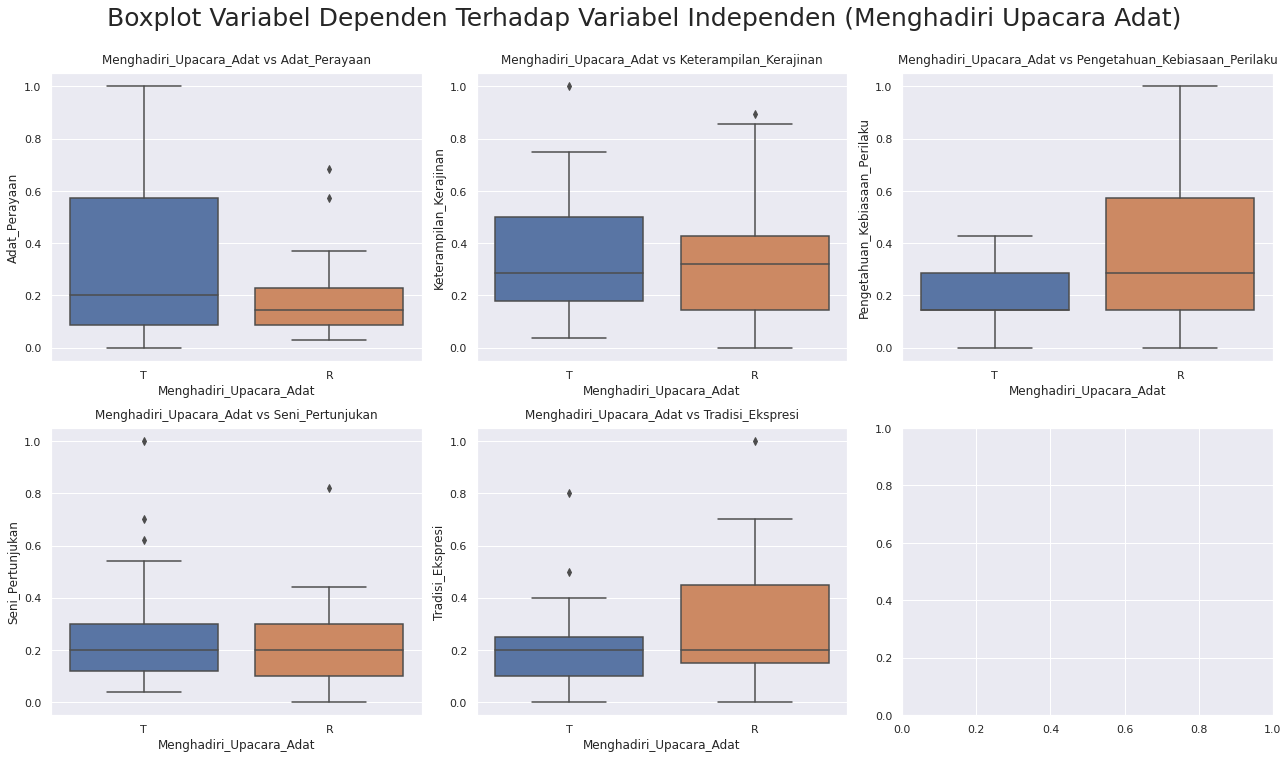

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplot Variabel Dependen Terhadap Variabel Independen (Menghadiri Upacara Adat)', y=1.05, size=25)
baris, kolom = 0, 0
for i in dependen_col:
  if kolom == 3: 
    kolom = 0
    baris += 1
  sns.boxplot(ax=axs[baris,kolom], x='Menghadiri_Upacara_Adat', y=i, data=data2)
  axs[baris,kolom].set_title(f'Menghadiri_Upacara_Adat vs {i}', pad=10)
  plt.tight_layout()
  kolom += 1
plt.show()

<font size='3'>
  Walaupun terdapat korelasi lemah dan outlier, penelitian akan tetap dilanjutkan

---

# Normal Multivariat

<font size='3'>
  Digunakan uji D’Agostino dan Pearson’s untuk menguji kenormalan multivariat data dengan &alpha; = 0.0001 dan hipotesis sebagai berikut.
<ul>
  <li>H0 : Data berdistribusi normal multivariat.</li>
  <li>H1 : Data tidak berdistribusi normal multivariat.</li>

In [ ]:
st, pvnm, alpha, simpan = [], [], 0.0001, 0
for col in dependen_col: 
  stt, pvnmm = scipy.stats.normaltest(data2[col].to_numpy())
  print(scipy.stats.normaltest(data2[col].to_numpy()))
  st.append(stt)
  pvnm.append(pvnmm)
  print(f'p-value untuk kolom {col} ialah {round(pvnmm,4)}')
  if pvnmm > alpha: continue
  else: simpan = 1
if simpan == 0:
  print('\nSeluruh p-value > alpha.')
else:
  print('\nTerdapat p-value <= alpha')

NormaltestResult(statistic=10.852933306594934, pvalue=0.004398610192488246)
p-value untuk kolom Adat_Perayaan ialah 0.0044
NormaltestResult(statistic=6.076088091759255, pvalue=0.04792854390540962)
p-value untuk kolom Keterampilan_Kerajinan ialah 0.0479
NormaltestResult(statistic=8.201763706621968, pvalue=0.016558067175189522)
p-value untuk kolom Pengetahuan_Kebiasaan_Perilaku ialah 0.0166
NormaltestResult(statistic=16.797813456853113, pvalue=0.00022511329966667354)
p-value untuk kolom Seni_Pertunjukan ialah 0.0002
NormaltestResult(statistic=9.635869265127656, pvalue=0.00808346523584149)
p-value untuk kolom Tradisi_Ekspresi ialah 0.0081

Seluruh p-value > alpha.


<font size='3'>
  Karena seluruh p-value > &alpha; maka H0 gagal ditolak untuk setiap variable sehingga data berdistribusi normal multivariat.
</font>

---

# Homogenitas

<font size='3'>
  Digunakan uji Bartlett untuk menguji homogenitas data dengan &alpha; = 0.005 dan hipotesis sebagai berikut.
<ul>
  <li>H0 : Data homogen.</li>
  <li>H1 : Data tidak homogen.</li>

In [ ]:
bart_col, count = [], 0
for dep_col in range(0,len(dependen_col)):
  for value in range(0,2):
    space = data2.loc[data2['Menghadiri_Upacara_Adat'] == data2['Menghadiri_Upacara_Adat'].unique()[value]][dependen_col[dep_col]]
    bart_col.append(space)
    count += 1
tam, statis, pval, col_tar = 0, [], [], []
for i in range(0,5):
  col_tar.append(dependen_col[i])
  gud1, gud2 = scipy.stats.bartlett(bart_col[0 + tam], bart_col[1 + tam])
  tam += 2
  statis.append(gud1)
  pval.append(gud2)

i = 0
for col in col_tar:
  if pval[i] > 0.005:
    guda = "H0 gagal ditolak sehingga Homogen."
  else:
    guda = "H0 ditolak sehingga tidak homogen"
  print(f'Untuk {col} terhadap setiap variabel independen memiliki p-value {pval[i]}, {guda}')
  i += 1

Untuk Adat_Perayaan terhadap setiap variabel independen memiliki p-value 0.023572126332475667, H0 gagal ditolak sehingga Homogen.
Untuk Keterampilan_Kerajinan terhadap setiap variabel independen memiliki p-value 0.757103778351201, H0 gagal ditolak sehingga Homogen.
Untuk Pengetahuan_Kebiasaan_Perilaku terhadap setiap variabel independen memiliki p-value 0.008722293493759319, H0 gagal ditolak sehingga Homogen.
Untuk Seni_Pertunjukan terhadap setiap variabel independen memiliki p-value 0.21936893500124754, H0 gagal ditolak sehingga Homogen.
Untuk Tradisi_Ekspresi terhadap setiap variabel independen memiliki p-value 0.15950148478627507, H0 gagal ditolak sehingga Homogen.


<font size='3'>
  Karena H0 gagal di tolak untuk setiap variable dependen, maka seluruh variable dependen bersifat homogen.

---

# MANOVA

<font size='3'>
  Karena setiap asumsi MANOVA sudah terpenuhi, maka metode MANOVA dapat digunakan. MANOVA dilakukan untuk untuk menganalisis hubungan antara beberapa variabel bebas dan beberapa variabel terikat. Pada kasus ini, MANOVA dilakukan untuk menguji apakah variabel kontribusi masyarakat (menghadiri upacara adat) berpengaruh terhadap banyak budaya berdasarkan provinsi. Pada test ini akan digunakan α = 0.1 dan menyatakan hipotesis sebagai berikut.
  <ul>
  <li>H0 : Variabel bebas dan terikat tidak ada hubungan secara signifikan (kontribusi masyarakat tidak berpengaruh terhadap banyak budaya).</li>
  <li>H1 : Variabel bebas dan terikat memiliki hubungan secara signifikan (kontribusi masyarakat berpengaruh terhadap banyak budaya).</li>
  </ul>

In [ ]:
dep_man = ' + '.join(dependen_col)
manv = MANOVA.from_formula(f'{dep_man} ~ Menghadiri_Upacara_Adat', data=data2)
print(manv.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.2850 5.0000 28.0000 14.0497 0.0000
          Pillai's trace 0.7150 5.0000 28.0000 14.0497 0.0000
  Hotelling-Lawley trace 2.5089 5.0000 28.0000 14.0497 0.0000
     Roy's greatest root 2.5089 5.0000 28.0000 14.0497 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
 Menghadiri_Upacara_Adat Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.7291 5.0000 28.0000  2.0806 0.0977
          Pillai's trace 0.2709 5.0000 28.0000  2.0806 0.0977
  Hotelling-Lawley trace 0

<font size='3'>
  Dari hasil tersebut, dapat dilihat bahwa nilai α lebih besar dari p-value, sehingga H0 ditolak. Maka terdapat hubungan signifikan antara variable independen terhadap variable dependen.
</font>